<a href="https://colab.research.google.com/github/SruthiSathya/Text-Classification-/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
import pandas as pd

tweet_data = files.upload()

Saving data_text.csv to data_text.csv


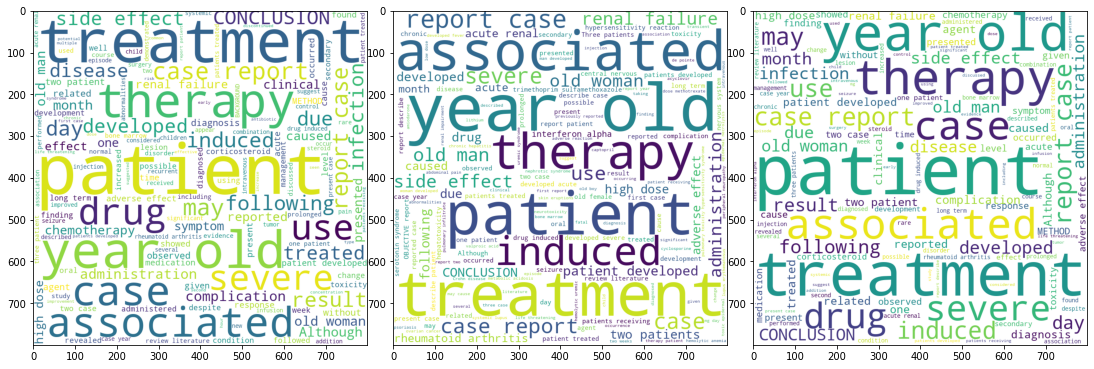

In [26]:
### let's start with checking words frequency in the given dataset. 
### This will give an insight of words having highest weightage and also, 
### help use in unsderstading if we need to retain or remove them.
### word frequency can be seen easily in form of WordCloud.

#Adding all the words from various rows in a single list
## all tweets
list_ = []
for i in range(0,len(tweet_data_df)):
    list_.append(tweet_data_df['tweets'][i])
reviews = "".join(list_)

## all tweets where lable = 1
list_1 = []
for i in range(0,len(tweet_data_df[tweet_data_df.label == 1])):
    list_1.append(tweet_data_df['tweets'][i])
reviews1 = "".join(list_1)


## all tweets where lable = 0
list_0 = []
for i in range(0,len(tweet_data_df[tweet_data_df.label == 0])):
    list_0.append(tweet_data_df['tweets'][i])
reviews0 = "".join(list_0)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
#word to WordCloud formation
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews) 

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews1)

wordcloud0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews0)

# plot the WordCloud image  
fig, ax = plt.subplots(1,3,figsize = (15, 5)) 
ax[0].imshow(wordcloud, cmap = 'Blues')  
plt.tight_layout(pad = 0)

ax[1].imshow(wordcloud1,cmap = 'afmhot') 
plt.tight_layout(pad = 0)

ax[2].imshow(wordcloud0,cmap = 'Oranges') 
plt.tight_layout(pad = 0)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[0.90429804 0.91093464 0.90490249]
0.9067117243856068
0.002996234061521033
[0.89502133 0.88590367 0.89795895]
0.8929613179034078
0.005132585854676006
[0.8033657  0.81229468 0.81874208]
0.8114674867943515
0.00630457106080334
0.14101436528877162
0.45338610378188215
0.40559953092934625
0.24266203426380736
0.4432730322271475
0.3140649335090452
1.0
0.8954081632653061
0.948543482883266
0.8301445578231292
0.9119568139925454
0.7413251318911696


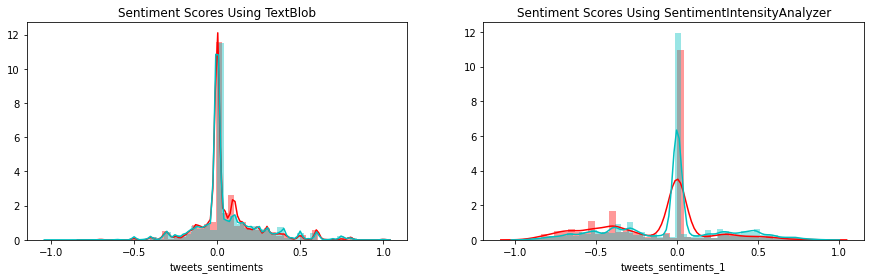

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

import string 
import nltk
#nltk.download("popular")

nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download("popular")
import re
import pandas as pd 
# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
# vectorisation objects
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import textblob 
from textblob import TextBlob


tweet_data_df = pd.read_csv("data_text.csv")
tweet_data_df.head(10)

stop_word = stopwords.words('english')
#print(set(stop_word))
#string.punctuation

'''
The clean_text function can clean the text data by removing punctuations, removing stop words, removing numbers, lammetization, and tokenizing.
'''

# stopword
def clean_text(text):
#     1. # remove punctuations
    text_p = "".join([word for word in text if word not in string.punctuation]).lower()
#     2. # remove stopwords
    text_s = " ".join([word for word in text_p.split() if word not in stop_word])
#     3. # remove numbers
    text_n = re.sub(pattern = "[0-9]+", repl='', string=text_s)
#     4. # lammetization - gets you the context of the words by mapping it to a root word
    text_l = " ".join([nltk.PorterStemmer().stem(word) for word in text_n.split()])
#     5. # tokenization
    tokens = re.split('\W+', text_l)
    return tokens 


X_train, X_test, y_train, y_test = train_test_split(tweet_data_df.tweets, tweet_data_df.label, test_size = 0.2, stratify = tweet_data_df.label, random_state = 42)


for est in [RandomForestClassifier(random_state=42), MultinomialNB(), GradientBoostingClassifier()]:
    rf_pip = Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                            ('estimator',est)])
    scores = cross_val_score(rf_pip,X_train,y_train, cv = 3, scoring= 'roc_auc')
    print(scores)
    print(np.average(scores))
    print(np.std(scores))



tweet_data_df['tweets_sentiments'] = tweet_data_df.tweets.apply(lambda x : TextBlob(x).polarity)
tweet_data_df.loc[:, ['tweets','tweets_sentiments']].head()
tweet_data_df[tweet_data_df['tweets_sentiments'] == 0].shape[0]/len(tweet_data_df) # ~43% of the tweets have zero sentiments as per TextBlob
tweet_data_df['tweets_sentiments_1'] = tweet_data_df.tweets.apply(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
tweet_data_df.loc[:, ['tweets','tweets_sentiments','tweets_sentiments_1']].head()
SentimentIntensityAnalyzer().polarity_scores('This is bad')
fig, ax = plt.subplots(1, 2, figsize= (15,4))

sns.distplot(tweet_data_df[tweet_data_df.label==1]['tweets_sentiments'], color='r', ax = ax[0])
sns.distplot(tweet_data_df[tweet_data_df.label==0]['tweets_sentiments'], color='c', ax = ax[0])
ax[0].set_title('Sentiment Scores Using TextBlob')

sns.distplot(tweet_data_df[tweet_data_df.label==1]['tweets_sentiments_1'], color='r', ax = ax[1])
sns.distplot(tweet_data_df[tweet_data_df.label==0]['tweets_sentiments_1'], color='c', ax = ax[1])
ax[1].set_title('Sentiment Scores Using SentimentIntensityAnalyzer')


label1 = tweet_data_df[tweet_data_df.label==1]
print(label1[label1['tweets_sentiments_1' ]>0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]==0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]<0].shape[0]/label1.shape[0])

label1 = tweet_data_df[tweet_data_df.label==0]
print(label1[label1['tweets_sentiments_1' ]>0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]==0].shape[0]/label1.shape[0])
print(label1[label1['tweets_sentiments_1' ]<0].shape[0]/label1.shape[0])

label1[label1['tweets_sentiments_1' ]<0].head()

# ## sample code to pass derived features to the pipeline.
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

def sentiment_score(x):
    return np.array([TextBlob(t).polarity for t in x]).reshape(-1, 1)

  

def tweets_length(x):
    return np.array([len(t) for t in x]).reshape(-1, 1)

rf = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vectorizer', CountVectorizer(clean_text)),
            ('tfidf', TfidfTransformer()),
        ])),
        ('length', Pipeline([
            ('count', FunctionTransformer(tweets_length, validate=False)),
        ])),
        ('sentiment', Pipeline([
            ('senti', FunctionTransformer(sentiment_score, validate=False)),
        ]))
    ])),
    ('clf', RandomForestClassifier())])

rf_pip = rf.fit(X_train,y_train) ## training
print(accuracy_score(y_train, rf_pip.predict(X_train))) 
print(accuracy_score(y_test, rf_pip.predict(X_test))) 


# Base Mode with diamention reduction 
from sklearn.decomposition import TruncatedSVD

rf= Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                         ('tfidfTransformation',TfidfTransformer()),
                         ('pca',TruncatedSVD(n_components = 10)),
                        ('estimator',RandomForestClassifier(random_state=42, n_jobs= -1))])
rf_pip = rf.fit(X_train,y_train) ## training
## model performance evaluation
print(accuracy_score(y_train, rf_pip.predict(X_train))) ## accuracy

print(accuracy_score(y_test, rf_pip.predict(X_test))) ## accuracy


print(roc_auc_score(y_train, rf_pip.predict(X_train))) ## auc score
print(roc_auc_score(y_test, rf_pip.predict(X_test))) ## auc score



